In [1]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import batsmen dataset
df=pd.read_csv('batters_odi.csv',encoding = "ISO-8859-1")

In [3]:
df

,Name,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s
0,Ishan Kishan,27,24,2,933,210,42.40,913,102.19,1,7
1,Virat Kohli,286,274,43,13437,183,58.16,14341,93.69,48,69
2,Shreyas Iyer,52,47,5,1931,113,45.97,1982,97.42,3,15
3,Rishabh Pant,30,26,1,865,125,34.60,811,106.65,1,5
4,KL Rahul,66,62,13,2468,112,50.36,2827,87.30,6,16
...,...,...,...,...,...,...,...,...,...,...,...
204,KA Pollard (WI),107,99,7,2398,119,26.06,2547,94.14,3,10
205,CJ Chibhabha (ZIM),103,103,2,2389,99,23.65,3784,63.13,0,16
206,GP Thorpe (ENG),82,77,13,2380,89,37.18,3344,71.17,0,21
207,Rahmat Shah (AFG),73,69,2,2359,114,35.20,3366,70.08,4,16


In [4]:
batt_feature = df[['Runs', 'HS', 'Ave', 'SR', '100s', '50s']]

In [5]:
batt_feature

,Runs,HS,Ave,SR,100s,50s
0,933,210,42.40,102.19,1,7
1,13437,183,58.16,93.69,48,69
2,1931,113,45.97,97.42,3,15
3,865,125,34.60,106.65,1,5
4,2468,112,50.36,87.30,6,16
...,...,...,...,...,...,...
204,2398,119,26.06,94.14,3,10
205,2389,99,23.65,63.13,0,16
206,2380,89,37.18,71.17,0,21
207,2359,114,35.20,70.08,4,16


In [6]:
#check for null values
batt_feature.isnull().sum()

Runs    0
HS      0
Ave     0
SR      0
100s    0
50s     0
dtype: int64

In [7]:
batt_feature['HS'].mean(),batt_feature['HS'].min(),batt_feature['HS'].max()

(137.3062200956938, 72, 269)

In [8]:
batt_feature['SR'].min()

51.71

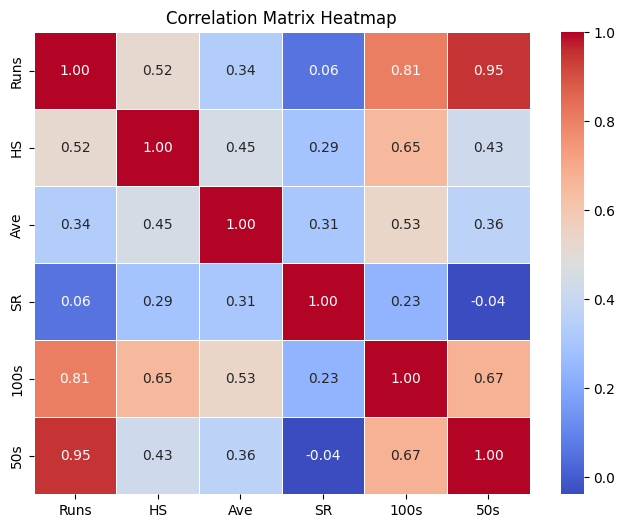

In [9]:
#identify correlation between features
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = batt_feature.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
# Conditions to rate players performance
condition1 = (batt_feature['Ave'] > 45) 
condition2 = (batt_feature['100s'] > 2) 
condition3 = (batt_feature['50s'] > 5) 
condition4 = (batt_feature['Runs'] >=2500)
condition5 = (batt_feature['SR'] >=80)
condition6 = (batt_feature['HS'] >=80)
con1_forplysel=(condition4 & condition2 & condition3)
cond2_forplysel=(condition1 & condition5 & condition6)
# Create the 'Best_Player' target variable based on the conditions
batt_feature['Best_Player'] = (con1_forplysel | cond2_forplysel).astype(int)

In [11]:
batt_feature['Best_Player'].value_counts()

Best_Player
1    151
0     58
Name: count, dtype: int64

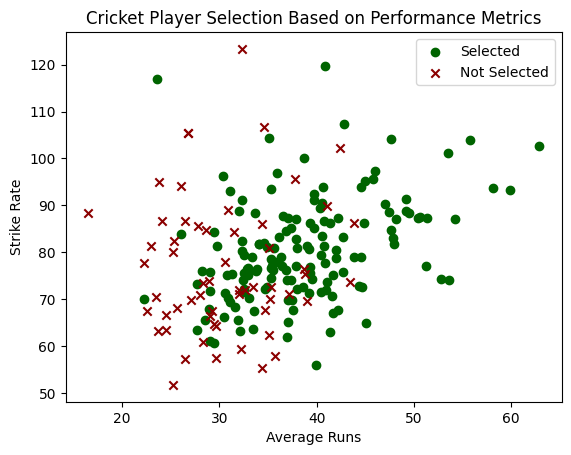

In [12]:
#Scatter plot to identify relation between features
fig1, ax = plt.subplots()

# Scatter plot for selected players
selected = df[batt_feature['Best_Player'] == 1]
ax.scatter(selected['Ave'], selected['SR'], color='#006400', marker='o', label='Selected')
# Scatter plot for not selected players
not_selected = df[batt_feature['Best_Player'] == 0]
ax.scatter(not_selected['Ave'], not_selected['SR'], color='#8B0000', marker='x', label='Not Selected')
# Add title and labels
ax.set_title('Cricket Player Selection Based on Performance Metrics')
ax.set_xlabel('Average Runs')
ax.set_ylabel('Strike Rate')

ax.legend()



In [13]:
X = batt_feature.drop(labels=['Best_Player'],axis=1)
y = batt_feature['Best_Player']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train,X_test,y_test,y_train)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_test_scaled[:5]

array([[ 1.21236078,  1.62715023,  0.37827006,  0.16099774,  1.51892529,
         0.65324272],
       [-0.81474294,  0.07119661,  1.46831452,  2.13652751,  0.15782004,
        -1.06812272],
       [ 0.08475672,  1.36293169,  1.44128862,  0.83048283,  0.52903056,
         0.22290136],
       [-0.95990029, -1.10310801, -1.56759442,  0.66247837, -0.83207468,
        -0.96053738],
       [ 0.44646028,  0.10055423, -0.35400301, -0.94411699, -0.21339048,
         0.49186471]])

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score,classification_report, accuracy_score

model_accuracy = []
model_recall = []
model_precision = []

# Create models
models = {
    'Random Forest': RandomForestClassifier(n_estimators = 10, criterion='entropy'),
    'SVC': SVC(probability=True),
    'Logistic Regression': LogisticRegression(),
    'Gaussian' : GaussianNB(),
    'Voting classifier': VotingClassifier(estimators=[('RF',RandomForestClassifier(n_estimators = 10,criterion='entropy')),('SVC', SVC(probability=True)), ('lr', LogisticRegression()), ('gnb', GaussianNB())], voting='soft',weights=[0.7,2,1,2]),
}


# Train and evaluate each model
for model_name, model in models.items():

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    #print(model_name,round(accuracy*100,2), round(recall*100,2))
    model_accuracy.append(accuracy*100)
    model_precision.append(precision*100)
    model_recall.append(recall*100)
    print('\t\t------'+model_name+'------\n')
    print(classification_report(y_test, y_pred),'\n')
    for i in range(len(y_pred)):
        #for pred_name,  in y_pred.items():
        if y_pred[i]==0:
            X_test_original = scaler.inverse_transform(X_test_scaled[[i]]).flatten().astype(float)
            X_test_original = [round(val, 1) for val in X_test_original]
        elif y_pred[i]==1:
            X_test_original = scaler.inverse_transform(X_test_scaled[[i]]).flatten().astype(float)
            X_test_original = [round(val, 1) for val in X_test_original]







		------Random Forest------

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.93      0.97        30

    accuracy                           0.95        42
   macro avg       0.93      0.97      0.94        42
weighted avg       0.96      0.95      0.95        42
 

		------SVC------

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.89      0.80      0.84        30

    accuracy                           0.79        42
   macro avg       0.74      0.78      0.75        42
weighted avg       0.81      0.79      0.79        42
 

		------Logistic Regression------

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.90      0.87      0.88        30

    accuracy                           0.83        42
   macro avg       0.79      0.81      0.

In [17]:
dump(model,'./../models/bat_model.joblib')

['./../models/bat_model.joblib']

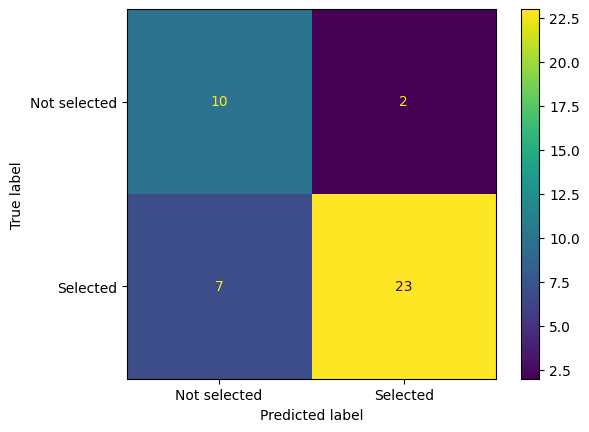

In [18]:
#Confusion matrix of voting classifier
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Not selected', 'Selected'])
cm_display.plot()
plt.show()

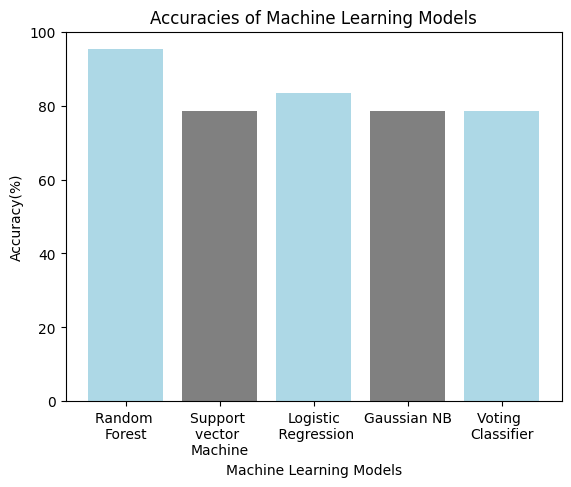

In [19]:
#Bar chart of accuracy
import matplotlib.pyplot as plt
# Define the model names and their corresponding accuracy scores
model_names = ['Random \nForest','Support \nvector \nMachine','Logistic\n Regression','Gaussian NB','Voting \nClassifier']
plt.bar(model_names, model_accuracy, color=['lightblue', 'gray'])
# Add labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy(%)')
plt.title('Accuracies of Machine Learning Models')
# Show the bar chart
plt.show()

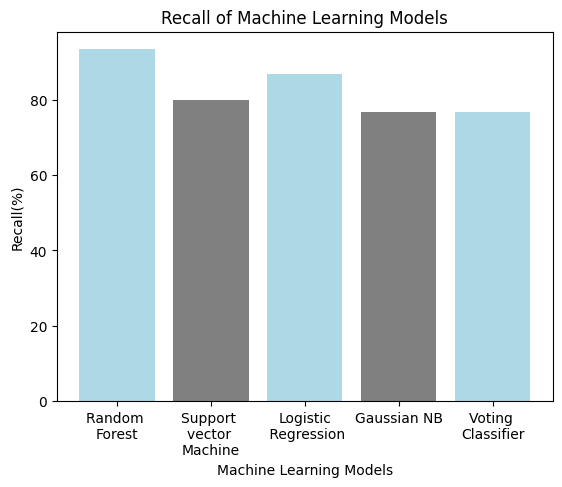

In [20]:
#Bar chart of recall
import matplotlib.pyplot as plt
plt.bar(model_names, model_recall, color=['lightblue', 'gray'])
plt.xlabel('Machine Learning Models')
plt.ylabel('Recall(%)')
plt.title('Recall of Machine Learning Models')
# Show the bar chart
plt.show()

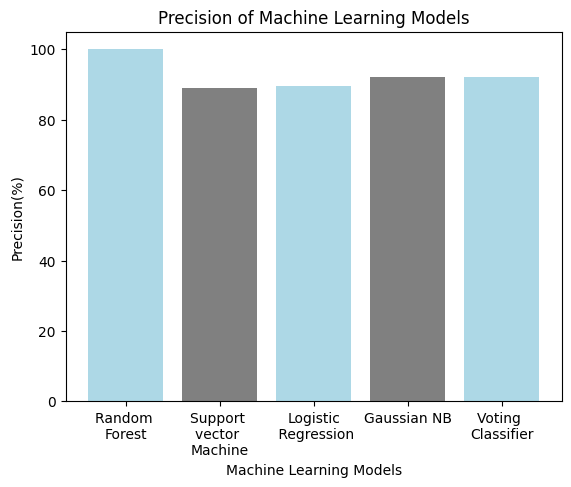

In [21]:
#Bar chart of precision

import matplotlib.pyplot as plt
plt.bar(model_names, model_precision, color=['lightblue', 'gray'])
plt.xlabel('Machine Learning Models')
plt.ylabel('Precision(%)')
plt.title('Precision of Machine Learning Models')

# Show the bar chart
plt.show()